# Using the data in the link below, attempt to model a customer’s propensity to join our loyalty program

### Ayan Karim

In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from scipy.stats import boxcox

In [2]:
df = pd.read_csv('customers_data.csv')

# Description of Data:

This data set contains demographic information on customers and labels whether they’ve joined the loyalty program. More specifically, it includes a mixture of categorical (binary), continuous and discrete variables on gender, age, whether there’s a card on file, the purchase amount and the time elapsed since last purchase for each customer. 

The original data set contained 12,000 rows of data and 7 columns, however after cleaning the data and under sampling to balance our classes, we have 9,741 rows of data and 6 columns that we actually use for modeling.

# Explore Data

In [3]:
df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [4]:
df.shape

(120000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 7 columns):
Unnamed: 0               120000 non-null int64
purch_amt                120000 non-null float64
gender                   120000 non-null object
card_on_file             120000 non-null object
age                      120000 non-null float64
days_since_last_purch    120000 non-null float64
loyalty                  120000 non-null bool
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 5.6+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'purch_amt', 'gender', 'card_on_file', 'age',
       'days_since_last_purch', 'loyalty'],
      dtype='object')

In [7]:
# Drop Unnamed column
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.describe()

,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908
std,20.473148,10.153072,16.422187
min,-43.950000,-22.000000,-9.000000
25%,30.210000,19.000000,45.000000
50%,43.970000,26.000000,57.000000
75%,57.830000,33.000000,68.000000
max,142.200000,71.000000,125.000000


# Clean Data

In [9]:
# Remove unrealistice values for continuous variables
df.purch_amt = df.purch_amt[df.purch_amt > df.purch_amt.quantile(.25)]
df.age = df.age[df.age > df.age.quantile(.25)]
df.days_since_last_purch = df.days_since_last_purch[df.days_since_last_purch > df.days_since_last_purch.quantile(.25)]

# Remove rows with null values
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47455 entries, 1 to 119999
Data columns (total 6 columns):
purch_amt                47455 non-null float64
gender                   47455 non-null object
card_on_file             47455 non-null object
age                      47455 non-null float64
days_since_last_purch    47455 non-null float64
loyalty                  47455 non-null bool
dtypes: bool(1), float64(3), object(2)
memory usage: 2.2+ MB


In [11]:
df.shape

(47455, 6)

In [12]:
df.describe()

,purch_amt,age,days_since_last_purch
count,47455.000000,47455.000000,47455.00000
mean,52.051808,30.093373,63.38940
std,14.710210,7.180507,11.81037
min,30.220000,20.000000,46.00000
25%,40.300000,24.000000,54.00000
50%,49.870000,29.000000,62.00000
75%,61.360000,35.000000,71.00000
max,125.530000,71.000000,118.00000


# Visualize Data

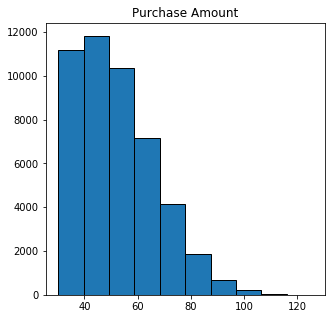

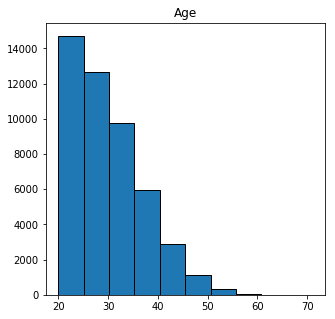

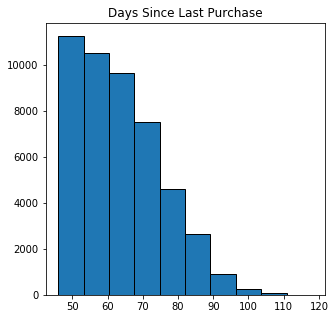

In [13]:
# Visualize distribution of continuous variables
plt.figure(figsize=(5,5))
plt.hist(df.purch_amt, edgecolor = 'k')
plt.title('Purchase Amount')
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df.age, edgecolor = 'k')
plt.title('Age')
plt.show()

plt.figure(figsize=(5,5))
plt.hist(df.days_since_last_purch, edgecolor = 'k')
plt.title('Days Since Last Purchase')
plt.show()

In [14]:
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
6,43.96,male,yes,36.0,64.0,False
9,93.63,female,no,40.0,47.0,True


In [15]:
# from scipy.stats import boxcox

# df.purch_amt = boxcox(df.purch_amt)[0]
# df.age = boxcox(df.age)[0]
# df.days_since_last_purch = boxcox(df.days_since_last_purch)[0]

In [16]:
df.head()

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
1,65.16,male,yes,23.0,61.0,False
2,40.60,female,no,36.0,49.0,False
3,38.01,male,yes,47.0,57.0,False
6,43.96,male,yes,36.0,64.0,False
9,93.63,female,no,40.0,47.0,True


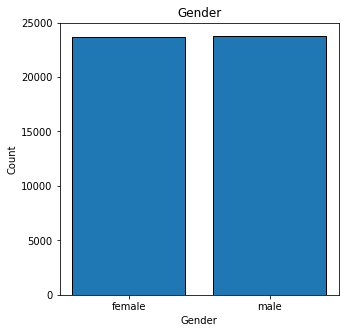

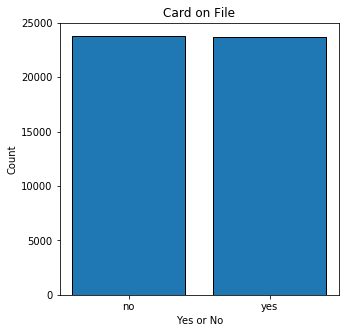

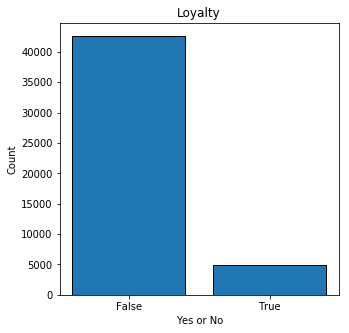

In [17]:
# Visualize categorical variables, class balances

x = ['female', 'male']
y = list(df.groupby(['gender']).count().loyalty)

plt.figure(figsize=(5,5))
plt.bar(x,y, edgecolor = 'k')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

x = ['no', 'yes']
y = list(df.groupby(['card_on_file']).count().loyalty)

plt.figure(figsize=(5,5))
plt.bar(x,y, edgecolor = 'k')
plt.title('Card on File')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.show()

x = ['False', 'True']
y = list(df.groupby(['loyalty']).count().gender)

plt.figure(figsize=(5,5))
plt.bar(x,y, edgecolor = 'k')
plt.title('Loyalty')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.show()

# Correct Class Imbalance

In [18]:
# Correct Class Imbalance by Under Sampling "No Loyalty"
no_loyalty = df[df['loyalty'] == False]
no_loyalty = no_loyalty.sample(frac=.115)

loyalty = df[df['loyalty'] == True]

undersample = pd.concat([no_loyalty, loyalty])
undersample = undersample.reset_index()
undersample = undersample.drop(['index'], axis=1)

In [19]:
undersample.shape

(9741, 6)

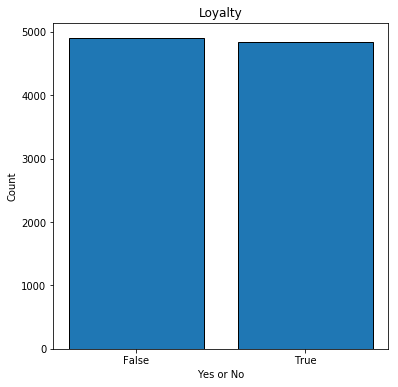

In [20]:
# Visualize Class Balabnce of Loyalty
x = ['False', 'True']
y = list(undersample.groupby(['loyalty']).count().gender)

plt.figure(figsize=(6,6))
plt.bar(x,y, edgecolor = 'k')
plt.title('Loyalty')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.show()

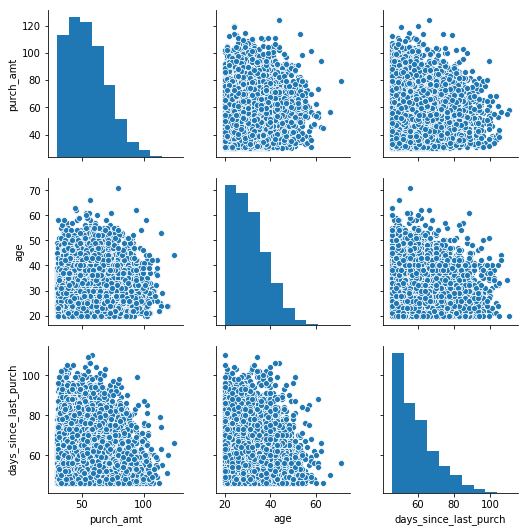

In [21]:
# Visualize Correlation and Distributions of undersampled dataset
sns.pairplot(undersample[['purch_amt', 'age', 'days_since_last_purch']])

In [22]:
# Correct Right Skew distribution with Box Box Distribution
undersample.purch_amt = boxcox(undersample.purch_amt)[0]
undersample.age = boxcox(undersample.age)[0]
undersample.days_since_last_purch = boxcox(undersample.days_since_last_purch)[0]

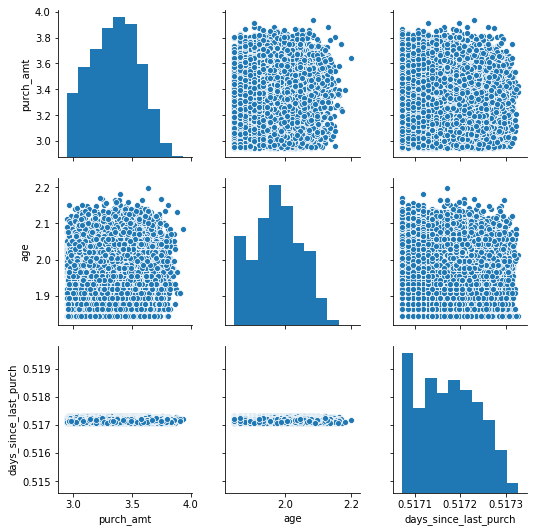

In [23]:
# Visualize Distributions after BoxCox Transformation
sns.pairplot(undersample[['purch_amt', 'age', 'days_since_last_purch']])

In [24]:
# Turn categorical Variables in to Numeric
undersample = pd.get_dummies(undersample, columns = ['gender', 'card_on_file'])
undersample['loyalty'] = np.where(undersample['loyalty']==True, 1, 0)

In [25]:
undersample.head()

,purch_amt,age,days_since_last_purch,loyalty,gender_female,gender_male,card_on_file_no,card_on_file_yes
0,3.202079,2.021273,0.517214,0,0,1,1,0
1,3.365489,1.906773,0.517095,0,1,0,1,0
2,3.380689,1.966116,0.517278,0,1,0,1,0
3,2.976627,1.986099,0.517178,0,1,0,0,1
4,3.128516,1.995447,0.517146,0,1,0,0,1


# Baseline Models

In [26]:
# Split into test and training set
X = undersample.drop(['loyalty'], axis=1)
Y = undersample['loyalty']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# List of models
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42), LinearSVC(), 
          GaussianNB(), LogisticRegression(random_state=42), GradientBoostingClassifier(n_estimators=200, random_state=42)]

model_names = []
accuracies = []

# Iterate through models to compare accuracies
for model in models:
    model_name = model.__class__.__name__
    model_names.append(model_name)
    model.fit(x_train, y_train)
    predictions = model.score(x_train, y_train)
    accuracies.append(predictions)
    

# Assign accuracies for each model to view
accuracy_df = pd.DataFrame()
accuracy_df['Model'] = model_names
accuracy_df['Accuracy'] = accuracies

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
accuracy_df

,Model,Accuracy
0,RandomForestClassifier,0.727028
1,LinearSVC,0.613450
2,GaussianNB,0.738706
3,LogisticRegression,0.611396
4,GradientBoostingClassifier,0.759625


In [28]:
# GradientBoostingClassifier cross validation

gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
cross_val_score(gbc, X, Y, cv=5)

array([0.72293484, 0.72997947, 0.74229979, 0.74948665, 0.71919918])

In [29]:
# View accuracy scores on classifying each author (precission, recall, f1-score and support)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       957
           1       0.72      0.78      0.75       992

   micro avg       0.73      0.73      0.73      1949
   macro avg       0.73      0.73      0.73      1949
weighted avg       0.73      0.73      0.73      1949



In [30]:
# Pass linear regression model to the RFE constructor

selector = RFE(gbc)
selector = selector.fit(X, Y)

# Sort ranked features
pd.set_option("display.max_rows", 999)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings = rankings.sort_values('Ranking')
rankings = rankings.reset_index()
rankings = rankings.drop(columns=['index'])
rankings = rankings.set_index('Features')
rankings = rankings.T
rankings

Features,purch_amt,age,days_since_last_purch,gender_male,card_on_file_yes,gender_female,card_on_file_no
Ranking,1,1,1,2,3,4,5


In [31]:
# RandomForestClassifier cross validation

rfc = RandomForestClassifier(n_estimators=300, max_depth=2, random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
cross_val_score(rfc, X, Y, cv=5)

array([0.71934325, 0.73459959, 0.70893224, 0.73716632, 0.71098563])

In [32]:
# View accuracy scores on classifying each author (precission, recall, f1-score and support)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       957
           1       0.69      0.85      0.76       992

   micro avg       0.73      0.73      0.73      1949
   macro avg       0.74      0.72      0.72      1949
weighted avg       0.74      0.73      0.72      1949



In [33]:
# Pass linear regression model to the RFE constructor

selector = RFE(rfc)
selector = selector.fit(X, Y)

# Sort ranked features
pd.set_option("display.max_rows", 999)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings = rankings.sort_values('Ranking')
rankings = rankings.reset_index()
rankings = rankings.drop(columns=['index'])
rankings = rankings.set_index('Features')
rankings = rankings.T
rankings

Features,purch_amt,age,days_since_last_purch,card_on_file_yes,gender_female,card_on_file_no,gender_male
Ranking,1,1,1,2,3,4,5


# Feature Engineering

In [34]:
# Feature Engineering
undersample['purch_amt'] = undersample['purch_amt'].apply(lambda x: x**2)
undersample = undersample.drop(['card_on_file_yes', 'gender_male'], axis=1)

# Second Round Training on New Features and Predictions

In [35]:
# GradientBoostingClassifier cross validation

gbc = GradientBoostingClassifier(n_estimators=200, random_state=42)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
cross_val_score(gbc, X, Y, cv=5)

array([0.72293484, 0.72997947, 0.74229979, 0.74948665, 0.71919918])

In [36]:
# View accuracy scores on classifying each author (precission, recall, f1-score and support)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       957
           1       0.72      0.78      0.75       992

   micro avg       0.73      0.73      0.73      1949
   macro avg       0.73      0.73      0.73      1949
weighted avg       0.73      0.73      0.73      1949



In [37]:
# RandomForestClassifier cross validation

rfc = RandomForestClassifier(n_estimators=300, max_depth=2, criterion='entropy', random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
cross_val_score(rfc, X, Y, cv=5)

array([0.72190867, 0.73100616, 0.7073922 , 0.7335729 , 0.71047228])

In [38]:
# View accuracy scores on classifying each author (precission, recall, f1-score and support)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.59      0.68       957
           1       0.68      0.85      0.76       992

   micro avg       0.72      0.72      0.72      1949
   macro avg       0.74      0.72      0.72      1949
weighted avg       0.74      0.72      0.72      1949

